In [57]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loaded csv file

In [59]:
df = pd.read_csv("/content/drive/MyDrive/cse303/data.csv", encoding='latin1')

/tmp/ipython-input-589118644.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/cse303/data.csv", encoding='latin1')


In [60]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.columns = df.columns.str.lower().str.strip()

#Filtered Maharashtra

In [62]:

df_maha = df[df['state'] == 'Maharashtra'].copy()
df_maha.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
197237,53.0,5/2/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,NaN,NaN,10.4,NaN,NaN,NaN,NaN,1987-02-05
197238,52.0,5/3/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,Industrial,18.2,35.8,NaN,NaN,NaN,NaN,1987-03-05
197239,52.0,6/2/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,Industrial,11.3,16.3,NaN,NaN,NaN,NaN,1987-02-06
197240,54.0,16-06-87,Maharashtra,Pune,Maharashtra Pollution Control Board,Residential,NaN,9.2,NaN,NaN,NaN,NaN,1987-06-16
197241,53.0,6/3/1987,Maharashtra,Pune,Maharashtra Pollution Control Board,NaN,8.8,7.7,NaN,NaN,NaN,NaN,1987-03-06


#shape of df

In [63]:

df_maha.shape

(60384, 13)

In [64]:
#info
df_maha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60384 entries, 197237 to 257620
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     42976 non-null  object 
 1   sampling_date                60384 non-null  object 
 2   state                        60384 non-null  object 
 3   location                     60384 non-null  object 
 4   agency                       41695 non-null  object 
 5   type                         60090 non-null  object 
 6   so2                          58322 non-null  float64
 7   no2                          59167 non-null  float64
 8   rspm                         55439 non-null  float64
 9   spm                          22345 non-null  float64
 10  location_monitoring_station  57529 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         60382 non-null  object 
dtypes: float64(5), 

#checked missing values for df_maha

In [65]:
print("missing values: ", df_maha.isnull().sum())

missing values:  stn_code                       17408
sampling_date                      0
state                              0
location                           0
agency                         18689
type                             294
so2                             2062
no2                             1217
rspm                            4945
spm                            38039
location_monitoring_station     2855
pm2_5                          60384
date                               2
dtype: int64


#checking duplicate values for df_maha

In [66]:
print("Duplicate: ",df_maha.duplicated().sum())

Duplicate:  98


#dropping duplicate values

In [67]:
df_maha.drop_duplicates(inplace=True)

In [68]:
print(df_maha.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60286 entries, 197237 to 257620
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     42878 non-null  object 
 1   sampling_date                60286 non-null  object 
 2   state                        60286 non-null  object 
 3   location                     60286 non-null  object 
 4   agency                       41602 non-null  object 
 5   type                         59996 non-null  object 
 6   so2                          58224 non-null  float64
 7   no2                          59069 non-null  float64
 8   rspm                         55355 non-null  float64
 9   spm                          22330 non-null  float64
 10  location_monitoring_station  57445 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         60284 non-null  object 
dtypes: float64(5), 

Converted time in datetime format

In [69]:
df_maha['sampling_date'] = pd.to_datetime(df_maha['sampling_date'], dayfirst=True, errors='coerce')
print(df_maha['sampling_date'])


197237   1987-02-05
197238   1987-03-05
197239   1987-02-06
197240          NaT
197241   1987-03-06
            ...    
257616          NaT
257617          NaT
257618          NaT
257619          NaT
257620          NaT
Name: sampling_date, Length: 60286, dtype: datetime64[ns]


filled missing values

In [70]:
for col in df_maha.columns:
    if df_maha[col].isnull().sum() > 0:
        if df_maha[col].dtype == "object":
            df_maha[col].fillna(df_maha[col].mode()[0], inplace=True)
        else:
            df_maha[col].fillna(df_maha[col].median(), inplace=True)


/tmp/ipython-input-39385996.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_maha[col].fillna(df_maha[col].mode()[0], inplace=True)
/tmp/ipython-input-39385996.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_maha[col].fillna(df_maha[col].mode()[0], inplace=True)
/tmp/ipython-input-39385996.py:6: Fu

In [71]:
print(df['type'])

0         Residential, Rural and other Areas
1                            Industrial Area
2         Residential, Rural and other Areas
3         Residential, Rural and other Areas
4                            Industrial Area
                         ...                
435737                                 RIRUO
435738                                 RIRUO
435739                                   NaN
435740                                   NaN
435741                                   NaN
Name: type, Length: 435742, dtype: object


# Fill missing type with 'Unknown'

In [72]:
df_maha['type'] = df_maha['type'].fillna('Unknown')

df_maha['type'] = df_maha['type'].replace({
    'Residential, Rural and other Areas': 'Residential',
    'Industrial Area': 'Industrial',
    'RIRUO': 'Other'
})


#listing all pollutions columns and grouping them based on type

In [73]:
pollutants = ['so2','no2','rspm','spm']


type_impact = df_maha.groupby('type')[pollutants].mean().sort_values('so2', ascending=False)
print(type_impact)


                              so2        no2        rspm         spm
type                                                                
Industrial Areas        21.538117  33.272552  100.755574  208.057473
Industrial              19.508404  35.180791  111.886935  185.932044
Residential             16.214154  31.783483   99.733116  181.545831
Residential and others  15.743828  28.965651   90.772740  204.882036
Sensitive Area           8.848837  30.385382   75.752492  177.794020
Sensitive Areas          6.288520  18.501276   71.877551  175.436224


plotting pollutant level based on Area type

<Figure size 1200x600 with 0 Axes>

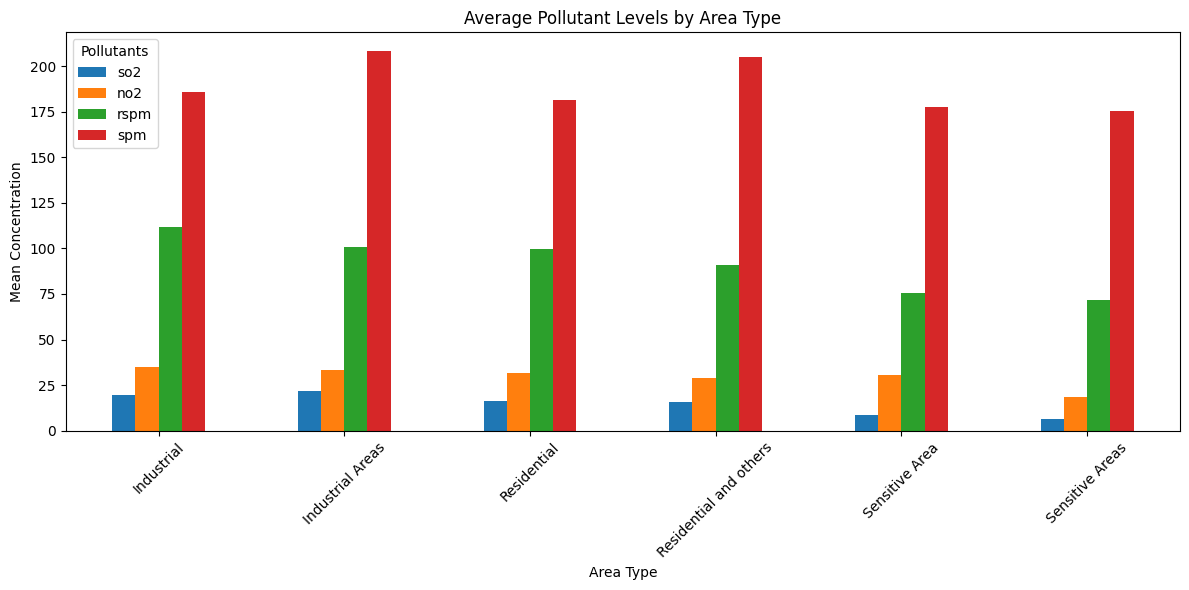

In [74]:
df_grouped = df_maha.groupby('type')[pollutants].mean()

plt.figure(figsize=(12, 6))
df_grouped.plot(kind='bar', figsize=(12,6))
plt.title("Average Pollutant Levels by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Mean Concentration")
plt.xticks(rotation=45)
plt.legend(title="Pollutants")
plt.tight_layout()
plt.show()


# Check for missing values

In [75]:
print(df_maha.isna().sum())


stn_code                           0
sampling_date                      0
state                              0
location                           0
agency                             0
type                               0
so2                                0
no2                                0
rspm                               0
spm                                0
location_monitoring_station        0
pm2_5                          60286
date                               0
dtype: int64


In [76]:
print(df_maha.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60286 entries, 197237 to 257620
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   stn_code                     60286 non-null  float64       
 1   sampling_date                60286 non-null  datetime64[ns]
 2   state                        60286 non-null  object        
 3   location                     60286 non-null  object        
 4   agency                       60286 non-null  object        
 5   type                         60286 non-null  object        
 6   so2                          60286 non-null  float64       
 7   no2                          60286 non-null  float64       
 8   rspm                         60286 non-null  float64       
 9   spm                          60286 non-null  float64       
 10  location_monitoring_station  60286 non-null  object        
 11  pm2_5                        0 non-null 

encoded categorical text to numbers

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_maha.select_dtypes(include="object").columns:
    df_maha[col] = df_maha[col].astype(str)
    le = LabelEncoder()
    df_maha[col] = le.fit_transform(df_maha[col])
    label_encoders[col] = le


# drop unnecessary columns

In [78]:
columns_to_drop = [
    'stn_code','agency','state','pm2_5',
    'location_monitoring_station'
]

df_maha = df_maha.drop(columns=columns_to_drop,errors='ignore')


Yearly Average Air Pollution Levels (SO2 & NO2) in Maharashtra

/tmp/ipython-input-3693528912.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df_maha[['so2', 'no2']].resample('Y').mean()


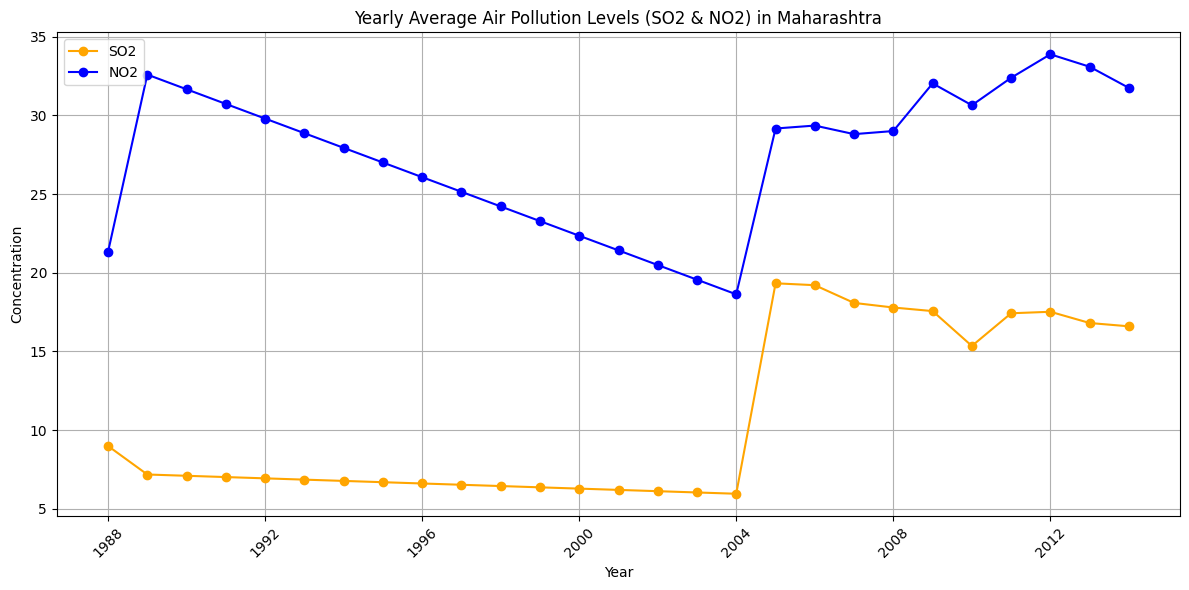

In [79]:
# Ensure 'sampling_date' is datetime
df_maha['sampling_date'] = pd.to_datetime(df_maha['sampling_date'], dayfirst=True, errors='coerce')

# Drop invalid dates
df_maha = df_maha.dropna(subset=['sampling_date'])

# Set 'sampling_date' as index
df_maha.set_index('sampling_date', inplace=True)

# Resample yearly and take mean of SO2 and NO2
df_yearly = df_maha[['so2', 'no2']].resample('Y').mean()

# Interpolate missing values to make the plot continuous
df_yearly = df_yearly.interpolate(method='linear')

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_yearly.index, df_yearly['so2'], marker='o', color='orange', label='SO2')
plt.plot(df_yearly.index, df_yearly['no2'], marker='o', color='blue', label='NO2')

plt.xlabel("Year")
plt.ylabel("Concentration")
plt.title("Yearly Average Air Pollution Levels (SO2 & NO2) in Maharashtra")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Correlation heat map

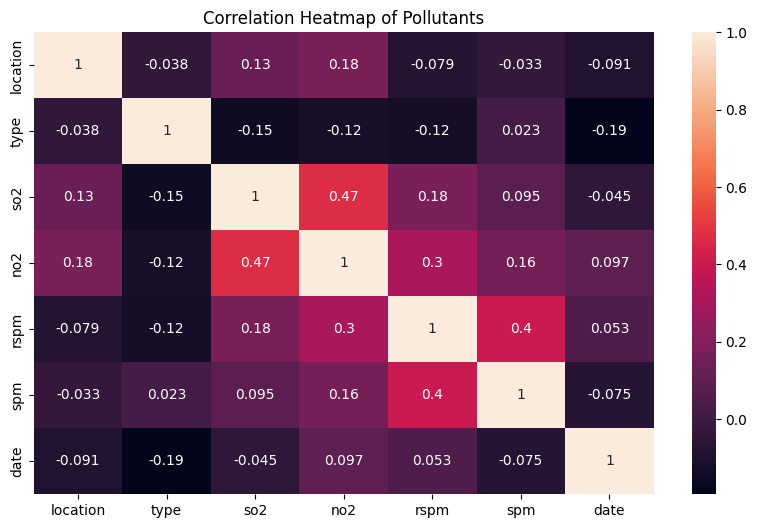

In [80]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df_maha.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap of Pollutants")
plt.show()


histogram

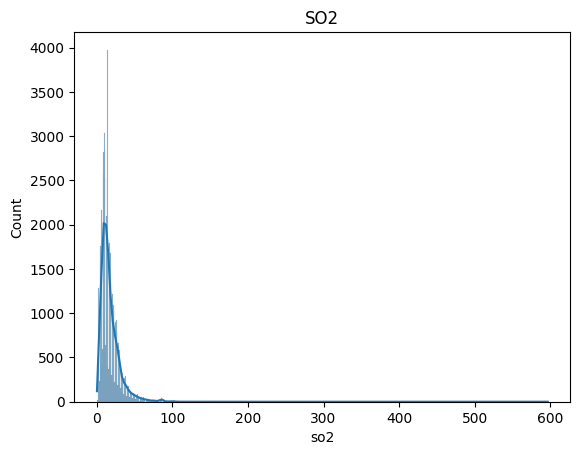

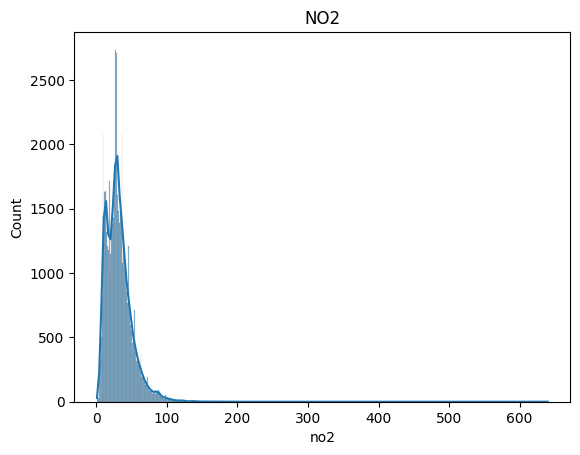

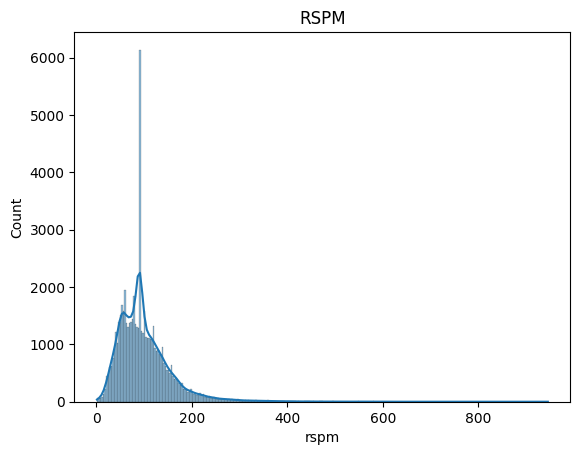

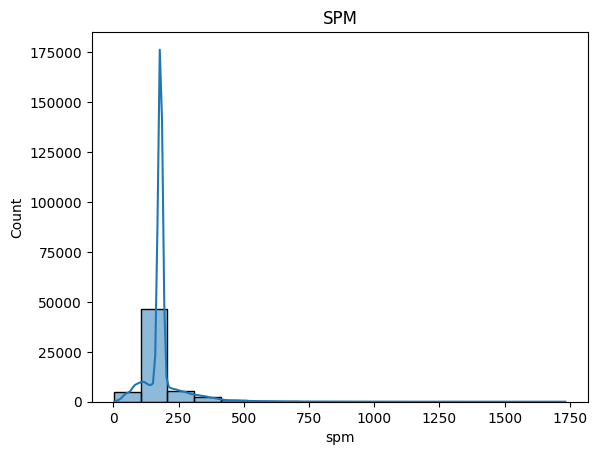

In [81]:
for col in ['so2','no2','rspm','spm']:
    sns.histplot(df_maha[col], kde=True)
    plt.title(col.upper())
    plt.show()

pairplot

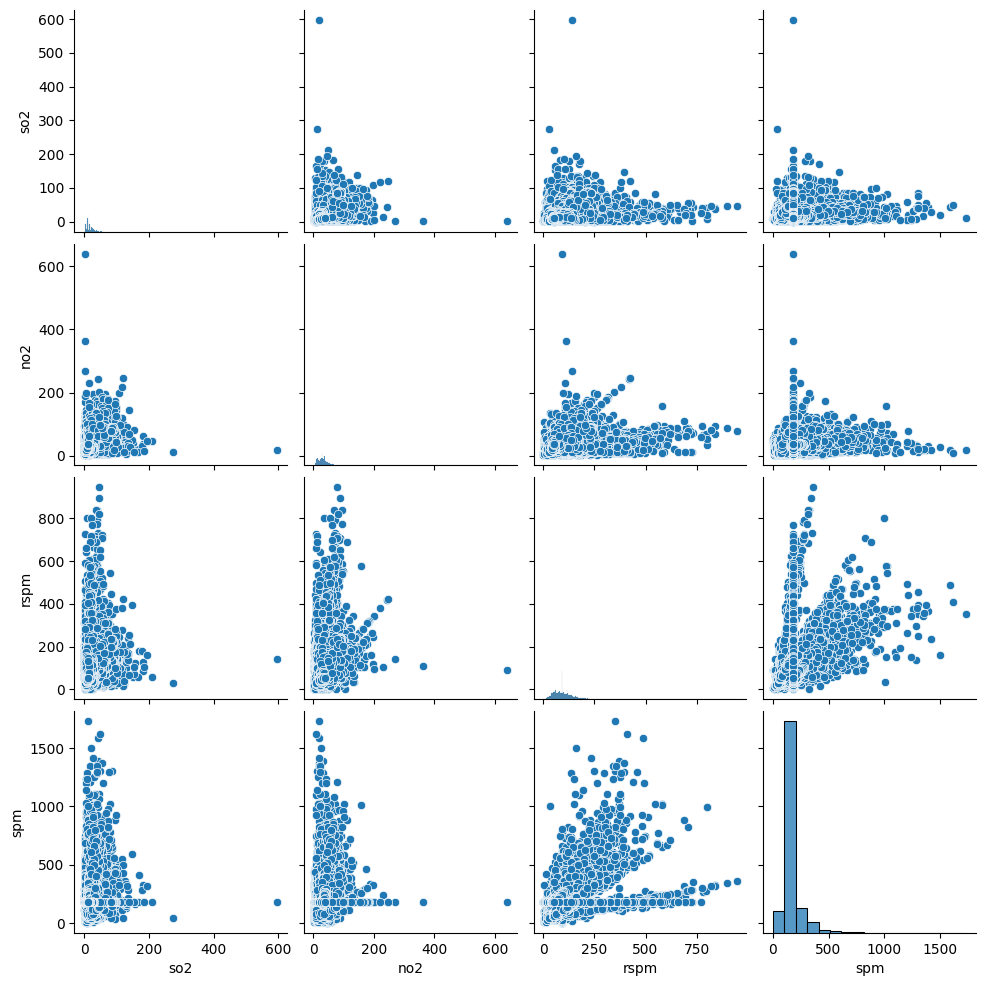

In [82]:
# Automatically select numeric pollutant columns
pollutants_existing = [col for col in df_maha.columns if col in ['so2','no2','rspm','spm']]

# Plot pairplot
sns.pairplot(df_maha[pollutants_existing])
plt.show()

mean average pollutant barplot

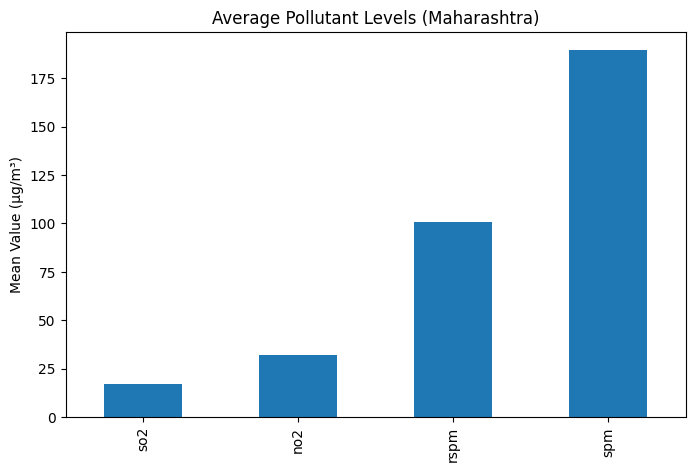

In [83]:
# Automatically select existing pollutant columns
pollutants_existing = [col for col in ['so2','no2','rspm','spm'] if col in df_maha.columns]


mean_values = df_maha[pollutants_existing].mean()


plt.figure(figsize=(8,5))
mean_values.plot(kind='bar')
plt.title("Average Pollutant Levels (Maharashtra)")
plt.ylabel("Mean Value (µg/m³)")
plt.show()

calculated statistics over the last 7 rows

In [84]:
window = 7

for col in pollutants_existing:
    df_maha[col + '_mean'] = df_maha[col].rolling(window).mean()
    df_maha[col + '_std']  = df_maha[col].rolling(window).std()

df_maha.dropna(inplace=True)
df_maha.head()


,location,type,so2,no2,rspm,spm,date,so2_mean,so2_std,no2_mean,no2_std,rspm_mean,rspm_std,spm_mean,spm_std
sampling_date,,,,,,,,,,,,,,,
1987-01-07,21,2,8.1,9.0,90.0,180.0,0,12.014286,3.597883,14.185714,9.921261,90.0,0.0,180.000000,0.000000
1987-01-12,21,2,0.7,47.6,90.0,293.0,1,10.114286,5.423230,19.500000,15.785436,90.0,0.0,196.142857,42.709985
1987-02-12,21,0,1.1,32.7,90.0,206.0,5,7.671429,5.009562,19.057143,15.287561,90.0,0.0,199.857143,42.199639
1988-01-01,21,2,1.8,28.9,90.0,271.0,9,6.314286,5.147630,20.857143,15.646390,90.0,0.0,212.857143,48.595022
1988-02-01,21,0,7.1,58.0,90.0,252.0,20,5.328571,3.952516,27.828571,19.884476,90.0,0.0,223.142857,48.098609


feature scaling / normalization

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_maha[pollutants_existing])
df_scaled = pd.DataFrame(scaled, columns=pollutants_existing)


converts raw pollutant concentrations into CPCB-standard AQI values and then resaomled daily aqi to monthly aqi

In [86]:
# Define AQI sub-index functions (CPCB standard)
def subindex_rspm(x):
    if x <= 50: return x
    elif x <= 100: return 50 + (x-50)*(50/50)
    elif x <= 250: return 100 + (x-100)*(100/150)
    elif x <= 350: return 200 + (x-250)*(100/100)
    elif x <= 430: return 300 + (x-350)*(100/80)
    else: return 500



def subindex_so2(x):
    if x <= 40: return x*50/40
    elif x <= 80: return 50 + (x-40)*50/40
    elif x <= 380: return 100 + (x-80)*100/300
    elif x <= 800: return 200 + (x-380)*100/420
    elif x <= 1600: return 300 + (x-800)*100/800
    else: return 500

def subindex_no2(x):
    if x <= 40: return x*50/40
    elif x <= 80: return 50 + (x-40)*50/40
    elif x <= 180: return 100 + (x-80)*100/100
    elif x <= 280: return 200 + (x-180)*100/100
    elif x <= 400: return 300 + (x-280)*100/120
    else: return 500

#  Function to calculate AQI per row
def calculate_aqi(row):
    si_values = []

    if 'rspm' in row and pd.notnull(row['rspm']):
        si_values.append(subindex_rspm(row['rspm']))

    if 'so2' in row and pd.notnull(row['so2']):
        si_values.append(subindex_so2(row['so2']))
    if 'no2' in row and pd.notnull(row['no2']):
        si_values.append(subindex_no2(row['no2']))

    if len(si_values) == 0:
        return None
    return max(si_values)

#  Calculate AQI column
df_maha['AQI'] = df_maha.apply(calculate_aqi, axis=1)

#  Resample monthly, ignoring NaN
df_monthly = df_maha['AQI'].resample('ME').mean()  # 'ME' = month end
df_monthly = df_monthly.dropna()  # Remove months where AQI could not be calculated

#  Show monthly AQI
print("Monthly AQI:\n")
print(df_monthly.head(25))

Monthly AQI:

sampling_date
1987-01-31     90.000000
1987-02-28     90.000000
1988-01-31     90.000000
1988-02-29     91.190000
1988-03-31     95.500000
1988-04-30     90.000000
2003-01-31     90.000000
2003-02-28     90.000000
2003-03-31     90.000000
2003-04-30     90.000000
2003-05-31     90.000000
2003-06-30     90.000000
2003-07-31     90.000000
2003-08-31     90.000000
2003-09-30     90.000000
2003-10-31     90.000000
2003-11-30     90.000000
2003-12-31     90.000000
2004-01-31    108.630960
2004-02-29    121.850117
2004-03-31    101.940819
2004-04-30    101.008435
2004-05-31    113.763148
2004-06-30    114.153516
2004-07-31     89.730877
Name: AQI, dtype: float64


Visualizing monthly average AQI trend

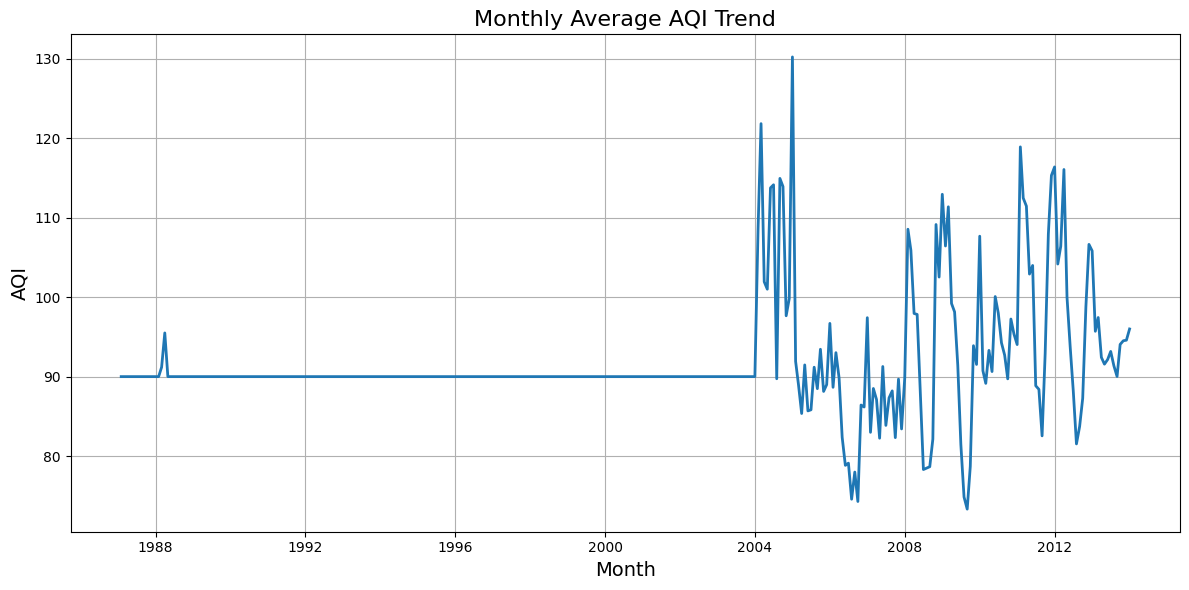

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(df_monthly.index, df_monthly.values, linewidth=2)

plt.title("Monthly Average AQI Trend", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("AQI", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()


# Prepared Monthly AQI Dataset with Lag Features

In [88]:
# List of pollutants
pollutants = ['so2', 'no2', 'rspm', 'spm']

# Make sure columns exist in df_maha
existing_cols = [col for col in pollutants if col in df_maha.columns]

# Include AQI + pollutants
all_columns = ['AQI'] + existing_cols

# Drop rows where AQI and all pollutants are NaN
df_maha_filtered = df_maha.dropna(subset=all_columns, how='all')

# Resample monthly, keeping AQI + pollutants
df_monthly = df_maha_filtered[all_columns].resample('ME').mean()

# Feature engineering
df_monthly['month'] = df_monthly.index.month
df_monthly['lag1'] = df_monthly['AQI'].shift(1)
df_monthly['lag2'] = df_monthly['AQI'].shift(2)

# Drop rows with NaN from lag
df_monthly = df_monthly.dropna()


In [89]:
print(df_monthly.columns)


Index(['AQI', 'so2', 'no2', 'rspm', 'spm', 'month', 'lag1', 'lag2'], dtype='object')


Define Features & Target

In [90]:
features = ['month', 'lag1', 'lag2', 'so2', 'no2','rspm', 'spm']
X = df_monthly[features]
y = df_monthly['AQI']



Train-Test Split

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



 Train Multivariate Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accuracy= r2*100

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R²: {r2:.2f}")
print(f"Accuracy of Linear Regression model:{accuracy:.2f}")



Linear Regression RMSE: 1.39
Linear Regression R²: 0.98
Accuracy of Linear Regression model:97.75


Visualizing monthly aqi prediction of Linear Regression model

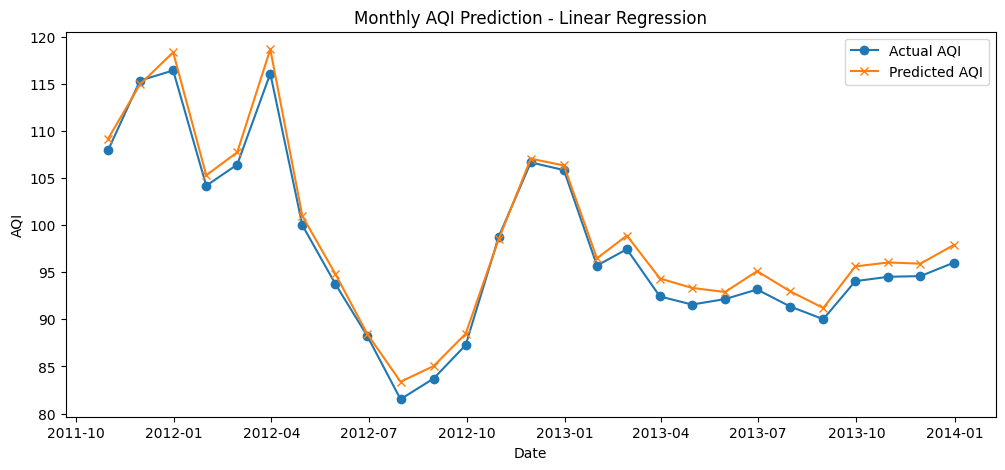

In [93]:
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual AQI', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted AQI', marker='x')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Monthly AQI Prediction - Linear Regression')
plt.legend()
plt.show()


Train RMSE and Test RMSE of LR

In [122]:
# Train predictions
y_train_pred = lr_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Test predictions (already done)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
accuracy= r2_test*100


print(f"Train RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")
print(f"Accuracy of Linear Regression model:{accuracy:.2f}%")



Train RMSE: 1.25, R²: 0.99
Test RMSE: 1.39, R²: 0.98
Accuracy of Linear Regression model:97.75%


scatter plot of actual and prediction

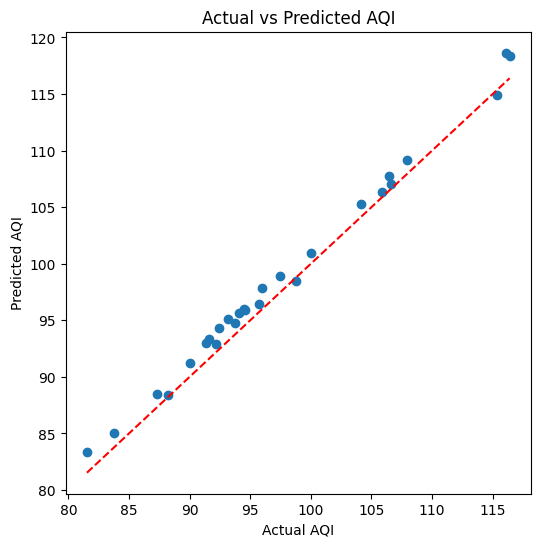

In [95]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()


Model 2-SVR

In [123]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

# Evaluate
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
accuracy= r2_test*100


# Print
print(f"Train RMSE of SVR = {rmse_train:.2f}, Train R² = {r2_train:.2f}")
print(f"Test RMSE of SVR = {rmse_test:.2f}, Test R² = {r2_test:.2f}")
print(f"Accuracy of SVR model:{accuracy:.2f}%")


Train RMSE of SVR = 0.58, Train R² = 1.00
Test RMSE of SVR = 1.61, Test R² = 0.97
Accuracy of SVR model:96.97%


Visualizing SVR prediction vs Model

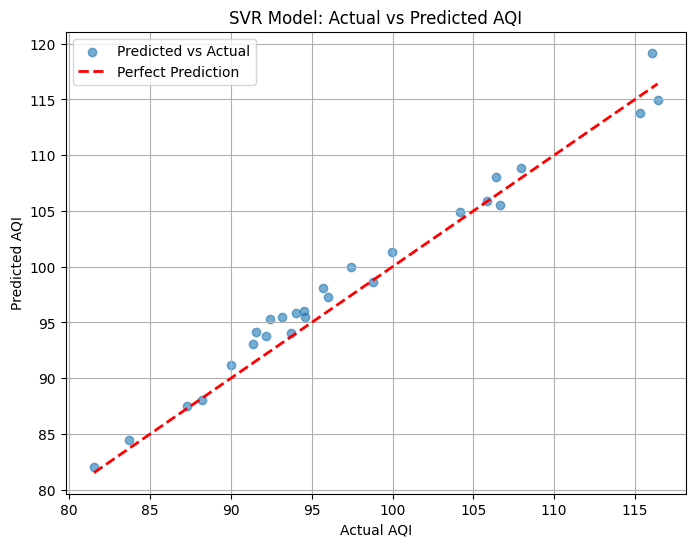

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter: actual vs predicted
plt.scatter(y_test, y_pred_svr, alpha=0.6, label='Predicted vs Actual')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('SVR Model: Actual vs Predicted AQI')
plt.legend()
plt.grid(True)
plt.show()


Model 3-Random forest

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
accuracy= r2_test*100

# Print
print(f"Train RMSE = {rmse_train:.2f}, Train R² = {r2_train:.2f}")
print(f"Test RMSE = {rmse_test:.2f}, Test R² = {r2_test:.2f}")
print(f"Accuracy of random forest model:{accuracy:.2f}%")



Train RMSE = 0.85, Train R² = 0.99
Test RMSE = 1.05, Test R² = 0.99
Accuracy of random forest model:98.71%


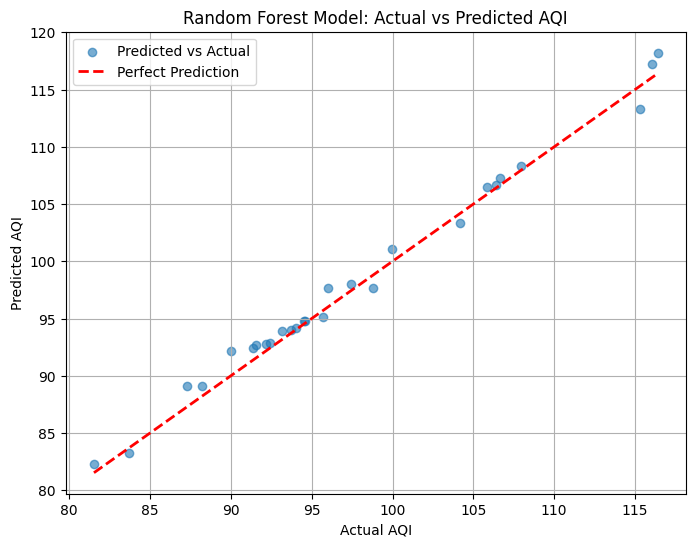

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter: actual vs predicted
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Predicted vs Actual')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Random Forest Model: Actual vs Predicted AQI')
plt.legend()
plt.grid(True)
plt.show()


Model-4:Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predictions
y_train_pred = gbr_model.predict(X_train)
y_test_pred = gbr_model.predict(X_test)

# Evaluate
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
accuracy= r2_test*100

# Print
print(f"Train RMSE = {rmse_train:.2f}, Train R² = {r2_train:.2f}")
print(f"Test RMSE = {rmse_test:.2f}, Test R² = {r2_test:.2f}")
print(f"Accuracy of Gradient Boosting model:{accuracy:.2f}%")


Train RMSE = 0.06, Train R² = 1.00
Test RMSE = 1.29, Test R² = 0.98
Accuracy of Gradient Boosting model:98.04%


visulaizing prediction vs actual

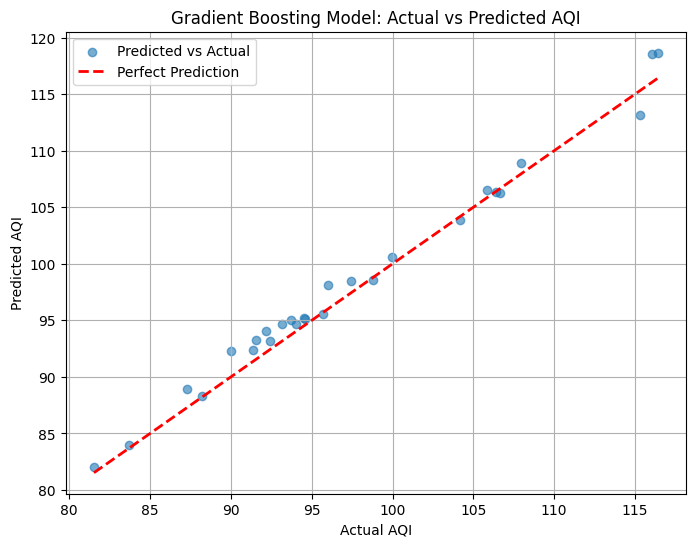

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter: actual vs predicted
plt.scatter(y_test, y_pred_gbr, alpha=0.6, label='Predicted vs Actual')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Gradient Boosting Model: Actual vs Predicted AQI')
plt.legend()
plt.grid(True)
plt.show()


trained all 4 models, evaluated them on the test set, printed their performance, and visualized how well each model predicts AQI over time.

Model Performance Comparison:

                       RMSE        R² Avg Accuracy (%)
Linear Regression  1.385995  0.977456        98.697104
SVR                1.607583  0.969671        98.610974
Random Forest      1.048919  0.987088        99.094966
Gradient Boosting  1.292372  0.980399        98.936066


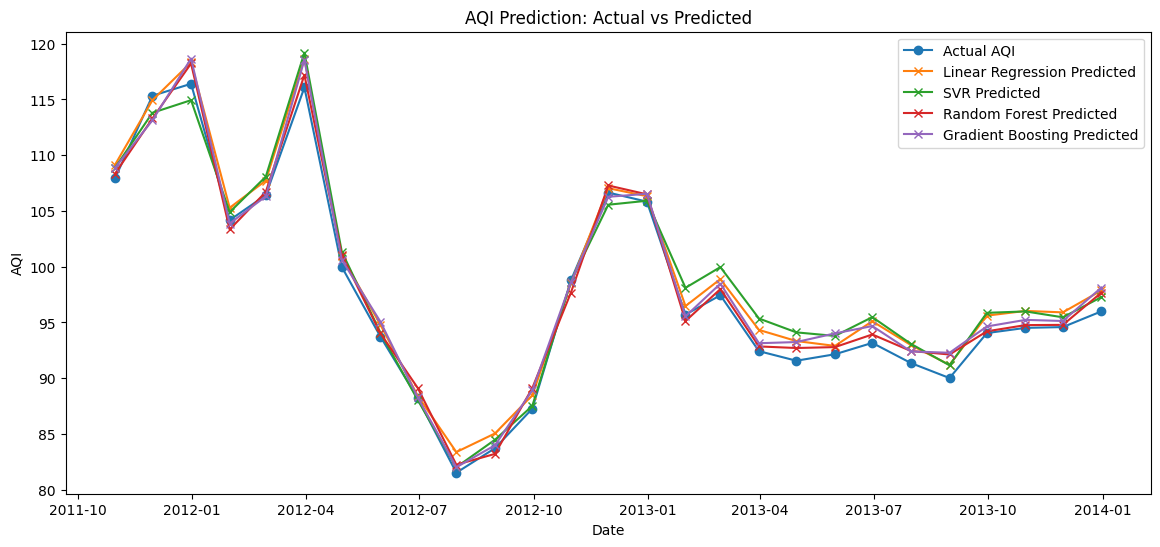

Average R² Score across all models: 0.9787


In [103]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Features & Target (multivariate)

# Scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
}

# Train, Predict, Evaluate with Avg Accuracy
results = {}

for name, model in models.items():
    # Use scaled data for SVR only
    if name == "SVR":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Calculate average accuracy (%)
    accuracy = np.mean(100 * (1 - np.abs(y_test - y_pred) / y_test))

    results[name] = {
        "RMSE": rmse,
        "R²": r2,
        "Avg Accuracy (%)": accuracy,
        "y_pred": y_pred
    }

# Show results in table
results_df = pd.DataFrame(results).T[['RMSE', 'R²', 'Avg Accuracy (%)']]
print("Model Performance Comparison:\n")
print(results_df)

# Plot predicted vs actual AQI
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual AQI', marker='o')

for name in models.keys():
    plt.plot(y_test.index, results[name]['y_pred'], label=f'{name} Predicted', marker='x')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Prediction: Actual vs Predicted')
plt.legend()
plt.show()

# Calculate average R² across all models
avg_r2_score = np.mean([res['R²'] for res in results.values()])
print(f"Average R² Score across all models: {avg_r2_score:.4f}")


In [104]:
df_maha.columns

Index(['location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date', 'so2_mean',
       'so2_std', 'no2_mean', 'no2_std', 'rspm_mean', 'rspm_std', 'spm_mean',
       'spm_std', 'AQI'],
      dtype='object')

which pollutants or lag features matter most in predicting AQI

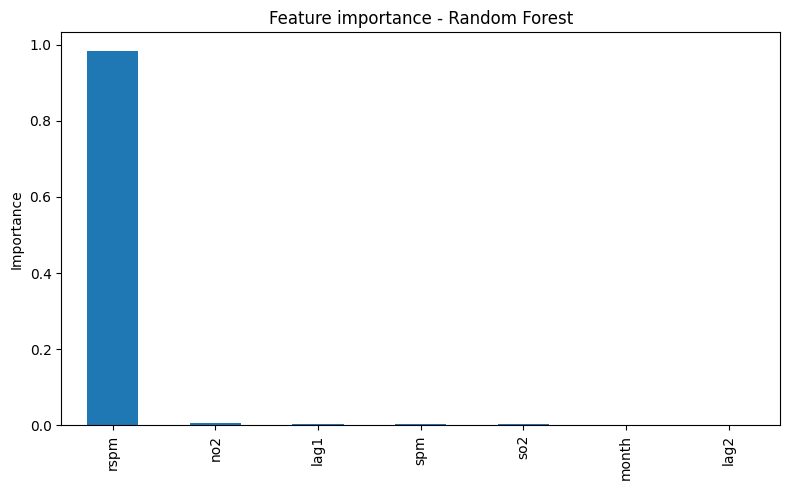

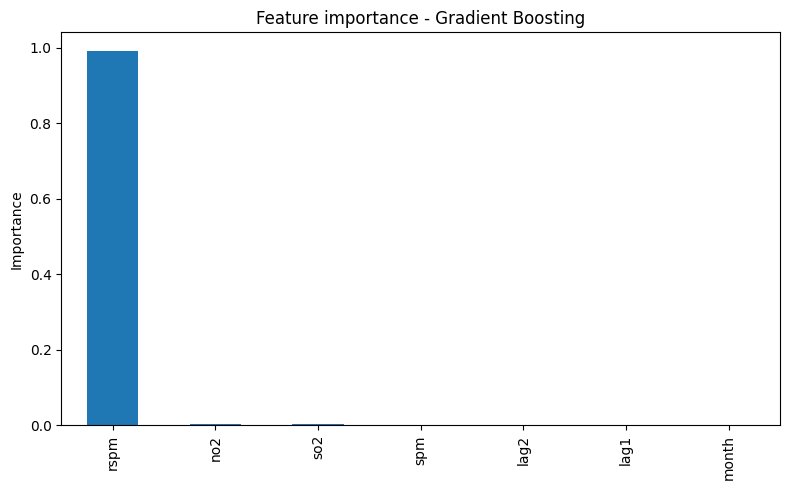

In [105]:
for name in ['Random Forest', 'Gradient Boosting']:
    if name in models: # Check if the model exists in the 'models' dictionary
        model_obj = models[name] # Get the model object directly from the 'models' dictionary
        if hasattr(model_obj, 'feature_importances_'):
            fi = model_obj.feature_importances_
            fi_series = pd.Series(fi, index=features).sort_values(ascending=False)
            plt.figure(figsize=(8,5))
            fi_series.plot(kind='bar')
            plt.title(f"Feature importance - {name}")
            plt.ylabel("Importance")
            plt.tight_layout()
            plt.show()

10-fold cross-validation on AQI prediction models to evaluate their stability.

In [106]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define Pipelines
# We use pipelines to ensure scaling is done specific to each fold to avoid data leakage
models_cv = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "SVR": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
    ]),
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))
    ])
}

# 2. Setup 10-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_data = []

print(f"{'Model':<20}  {'Median RMSE':<15}  {'Mean RMSE':<15}")
print("-" * 55)

for name, pipeline in models_cv.items():
    # Calculate Negative MSE (Scikit-learn cross_val returns negative values for errors)
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

    # Convert to positive RMSE
    rmse_scores = np.sqrt(-scores)

    # Calculate Median and Mean
    median_rmse = np.median(rmse_scores)
    mean_rmse = np.mean(rmse_scores)

    print(f"{name:<20}  {median_rmse:.4f}           {mean_rmse:.4f}")

    # Store results for plotting
    for score in rmse_scores:
        cv_data.append({'Model': name, 'RMSE': score})



Model                 Median RMSE      Mean RMSE      
-------------------------------------------------------
Linear Regression     1.3116           1.4090
SVR                   2.3224           2.3856
Random Forest         1.3113           1.5267
Gradient Boosting     1.2105           1.4386


10-fold cross-validation again, and calculating accuracy based on AQI prediction

In [107]:
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold

# 1. Define a custom scorer for "Accuracy %"
def accuracy_metric(y_true, y_pred):
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_true, y_pred)
    # Convert to Accuracy: 100% - Error%
    accuracy = 100 * (1 - mape)
    return accuracy

# Create the scorer to use in cross_val_score
accuracy_scorer = make_scorer(accuracy_metric)

# 2. Setup 10-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

results_acc = []

print(f"{'Model':<20}  {'Avg Accuracy (%)':<20}  {'Avg R² Score':<15}")
print("-" * 65)

for name, pipeline in models_cv.items():
    # Calculate Accuracy %
    acc_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=accuracy_scorer)

    # Calculate R2 scores
    r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')

    # Get Averages
    avg_acc = np.mean(acc_scores)
    avg_r2 = np.mean(r2_scores)

    print(f"{name:<20}  {avg_acc:.2f}%                {avg_r2:.4f}")

Model                 Avg Accuracy (%)      Avg R² Score   
-----------------------------------------------------------------
Linear Regression     98.88%                0.9789
SVR                   98.45%                0.9445
Random Forest         98.92%                0.9764
Gradient Boosting     98.98%                0.9794


last month aqi taken

In [108]:
last_month = df_monthly.iloc[-1]


Predict future AQI for using separate models for AQI and pollutants

In [109]:
import pandas as pd
import numpy as np

def predict_future_aqi(aqi_model, pollutant_models, df_monthly, n_months=12):

    temp = df_monthly.copy()
    future_preds = []

    for i in range(n_months):

        # ------- Predict pollutants -------
        pred_pollutants = {}
        for pol, model in pollutant_models.items():
            lag1 = temp[pol].iloc[-1]
            lag2 = temp[pol].iloc[-2] if len(temp) > 1 else lag1
            month_num = temp.index[-1].month % 12 + 1
            features = [[month_num, lag1, lag2]]
            pred_pollutants[pol] = model.predict(features)[0]

        # ------- Predict AQI -------
        lag1_aqi = temp['AQI'].iloc[-1]
        lag2_aqi = temp['AQI'].iloc[-2] if len(temp) > 1 else lag1_aqi
        next_month = temp.index[-1].month % 12 + 1

        aqi_features = [[
            next_month, lag1_aqi, lag2_aqi,
            pred_pollutants.get('so2', 0),
            pred_pollutants.get('no2', 0),
            pred_pollutants.get('rspm', 0),
            pred_pollutants.get('spm', 0)
        ]]

        next_aqi = aqi_model.predict(aqi_features)[0]

        next_date = temp.index[-1] + pd.DateOffset(months=1)

        # ------- SAFE row insert using dict -------
        new_row = {
            'AQI': next_aqi,
            'so2': pred_pollutants.get('so2', 0),
            'no2': pred_pollutants.get('no2', 0),
            'rspm': pred_pollutants.get('rspm', 0),
            'spm': pred_pollutants.get('spm', 0)
        }

        temp.loc[next_date] = new_row

        future_preds.append({
            'Date': next_date,
            'Predicted_AQI': next_aqi,
            **pred_pollutants
        })

    return pd.DataFrame(future_preds)




In [110]:
last_month = df_monthly.iloc[-1]


In [111]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data for pollutant models
pollutant_models = {}
pollutants_list = ['so2', 'no2', 'rspm', 'spm']

for pollutant in pollutants_list:
    # Create lag features for the current pollutant
    df_monthly[f'{pollutant}_lag1'] = df_monthly[pollutant].shift(1)
    df_monthly[f'{pollutant}_lag2'] = df_monthly[pollutant].shift(2)

    # Drop rows with NaN values created by shifting
    temp_df = df_monthly.dropna(subset=[pollutant, f'{pollutant}_lag1', f'{pollutant}_lag2'])

    # Define features and target for the pollutant model
    X_pol = temp_df[['month', f'{pollutant}_lag1', f'{pollutant}_lag2']]
    y_pol = temp_df[pollutant]

    # Train a RandomForestRegressor model for the current pollutant
    pol_model = RandomForestRegressor(n_estimators=100, random_state=42) # Simplified parameters
    pol_model.fit(X_pol, y_pol)

    # Store the trained model in the dictionary
    pollutant_models[pollutant] = pol_model

# Now call predict_future_aqi with the defined pollutant_models dictionary
future_aqi = predict_future_aqi(aqi_model=gbr_model, pollutant_models=pollutant_models, df_monthly=df_monthly, n_months=12)
print(future_aqi)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/

         Date  Predicted_AQI        so2        no2        rspm         spm
0  2014-01-31     100.688509  16.193204  31.541181  106.049166  180.362375
1  2014-02-28     100.792928  15.621964  31.100286  107.324168  179.806544
2  2014-03-28     100.731356  16.039830  29.462852  107.913573  178.810606
3  2014-04-28     109.444158  15.402813  29.238958  117.838037  182.428747
4  2014-05-28     107.026085  15.232488  30.171860  114.836085  183.370638
5  2014-06-28     100.740556  15.274443  29.285155  105.579267  181.018895
6  2014-07-28      97.354753  15.377890  27.738178  101.442108  180.221622
7  2014-08-28      92.470938  15.594615  28.732112   97.257391  179.381724
8  2014-09-28      92.702589  15.699112  29.273077   96.714012  177.952332
9  2014-10-28      98.641658  16.579043  31.933628  104.240378  191.296355
10 2014-11-28     100.467722  17.361605  31.287626  105.870837  192.944549
11 2014-12-28     108.886188  17.235312  30.941506  117.664855  207.421975


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/

In [112]:
def get_aqi_category(aqi_value):
    if aqi_value <= 50: return 'Good'
    elif aqi_value <= 100: return 'Satisfactory'
    elif aqi_value <= 200: return 'Moderate'
    elif aqi_value <= 300: return 'Poor'
    elif aqi_value <= 400: return 'Very Poor'
    else: return 'Severe'

future_aqi['Category'] = future_aqi['Predicted_AQI'].apply(get_aqi_category)
print(future_aqi['Category'])

0         Moderate
1         Moderate
2         Moderate
3         Moderate
4         Moderate
5         Moderate
6     Satisfactory
7     Satisfactory
8     Satisfactory
9     Satisfactory
10        Moderate
11        Moderate
Name: Category, dtype: object
